In [1]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
del df["Id"]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

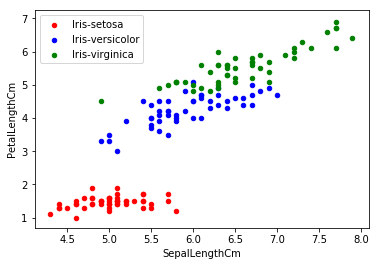

In [5]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1
                        , color = colors[i], ax = ax, label = v)
    

In [11]:
scaler = preprocessing.StandardScaler()
X = df[features]
X_std = scaler.fit_transform(X.values)

In [7]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
y = kmeans.predict(X_std)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

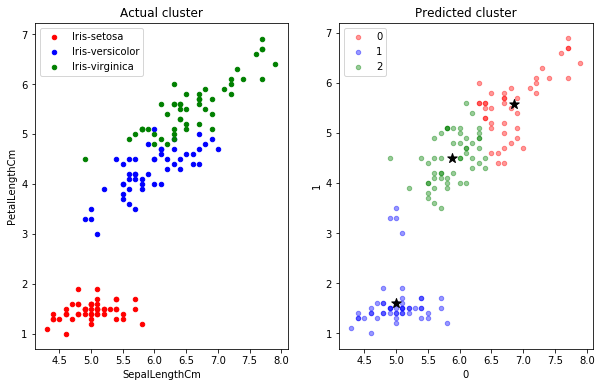

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1
                        , color = colors[i],label = v, ax = axes[0])

    
axes[0].set_title("Actual cluster")

for i in range(k):
    X[y == i].plot.scatter(0, 1, color = colors[i]
                        , ax = axes[1], alpha = 0.4, label = i)
    
axes[1].set_title("Predicted cluster")

pd.DataFrame(scaler
    .inverse_transform(kmeans.cluster_centers_))\
.plot.scatter(0, 1,  marker = "*", s = 100, color = "black", ax = axes[1])

In [27]:
metrics.homogeneity_score(y, df.Species)

0.5853247279721064

In [32]:
kmeans.cluster_centers_[0].reshape((1, -1)).shape

(1, 2)

In [34]:
df["distance"] = 0.0

for i in range(k):
    points = X_std[y == i]
    centroid = kmeans.cluster_centers_[i].reshape((1, -1))
    distances = metrics.euclidean_distances(points, centroid).flatten()
    df.loc[y==i, "distance"] = distances

In [36]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance
0,5.1,3.5,1.4,0.2,Iris-setosa,0.160599
1,4.9,3.0,1.4,0.2,Iris-setosa,0.170454
2,4.7,3.2,1.3,0.2,Iris-setosa,0.407209
3,4.6,3.1,1.5,0.2,Iris-setosa,0.494562
4,5.0,3.6,1.4,0.2,Iris-setosa,0.112879


In [37]:
df["cluster"] = y

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0.160599,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0.170454,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0.407209,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0.494562,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0.112879,1


In [39]:
df.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.558198,43
1,0.402361,54
2,0.435640,53


In [42]:
np.percentile(df.distance,[90, 95, 99])

array([0.80913963, 1.03023421, 1.23918885])

In [47]:
df["anamoly"] = df.distance>1.03
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance,cluster,anamoly
80,5.5,2.4,3.8,1.1,Iris-versicolor,0.599966,2,False
99,5.7,2.8,4.1,1.3,Iris-versicolor,0.306665,2,False
97,6.2,2.9,4.3,1.3,Iris-versicolor,0.410372,2,False
94,5.6,2.7,4.2,1.3,Iris-versicolor,0.370874,2,False
84,5.4,3.0,4.5,1.5,Iris-versicolor,0.573849,2,False
114,5.8,2.8,5.1,2.4,Iris-virginica,0.356806,2,False
145,6.7,3.0,5.2,2.3,Iris-virginica,0.283506,0,False
34,4.9,3.1,1.5,0.1,Iris-setosa,0.139547,1,False
136,6.3,3.4,5.6,2.4,Iris-virginica,0.676539,0,False
100,6.3,3.3,6.0,2.5,Iris-virginica,0.719630,0,False


In [48]:
df[df.anamoly]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance,cluster,anamoly
60,5.0,2.0,3.5,1.0,Iris-versicolor,1.081522,1,True
105,7.6,3.0,6.6,2.1,Iris-virginica,1.073678,0,True
106,4.9,2.5,4.5,1.7,Iris-virginica,1.179680,2,True
117,7.7,3.8,6.7,2.2,Iris-virginica,1.206364,0,True
118,7.7,2.6,6.9,2.3,Iris-virginica,1.270726,0,True
122,7.7,2.8,6.7,2.0,Iris-virginica,1.206364,0,True
131,7.9,3.8,6.4,2.0,Iris-virginica,1.348258,0,True
135,7.7,3.0,6.1,2.3,Iris-virginica,1.064070,0,True


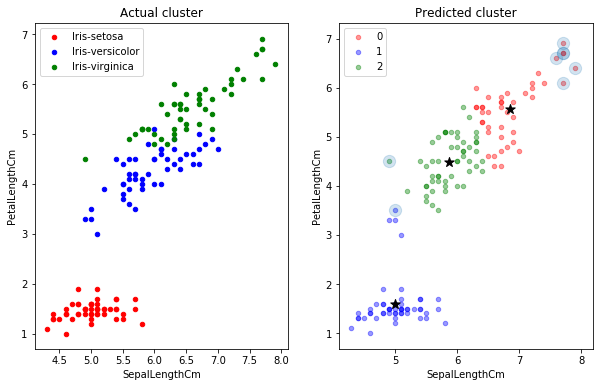

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1
                        , color = colors[i],label = v, ax = axes[0])

    
axes[0].set_title("Actual cluster")

for i in range(k):
    X[y == i].plot.scatter(0, 1, color = colors[i]
                        , ax = axes[1], alpha = 0.4, label = i)
    
axes[1].set_title("Predicted cluster")

pd.DataFrame(scaler
    .inverse_transform(kmeans.cluster_centers_))\
.plot.scatter(0, 1,  marker = "*", s = 100, color = "black", ax = axes[1])


df[df.anamoly].plot.scatter(features[0], features[1], ax = axes[1]
                , marker = "o", alpha = 0.2,  s = 150)